# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Desy Iba Ricoida]
- **Email:** [desih@mdp.ac.id]
- **ID Dicoding:** [desyiba62]

## Menentukan Pertanyaan Bisnis

1.   Bagaimana Trend Penyewaan Sepeda berdasarkan **musim**?
2.   Bagaimana Trend Penyewaan sepeda berdasarkan **Cuaca** (*weather situation*)?
3.   Bagaimana Perbandingan Penyewaan Sepeda berdasarkan **jenis penyewa** (*casual vs register*)?
4.   Perbandingan total Penyewaan Sepeda berdasarkan kategori hari (*weekdays vs weekend*) dan jenis penyewa.
5.   Bagaimana trend total **penyewaan sepeda perbulan**?


## Import Semua Packages/Library yang Digunakan

In [2]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import urllib

## Data Wrangling

### Gathering Data

In [3]:
# memuat tabel data day dan menampilkan 5 baris pertama dari Data Frame
day_df = pd.read_csv('/content/day.csv')
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# memuat tabel data day dan menampilkan 5 baris pertama dari Data Frame
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data Day dan hour memiliki perbedaan pada kolom hr yang memuat data lama jam penyewaan
- Beberapa kolom seperti season, dteday,casula, register, working day, etc merupakan data yang akan diproses untuk menjawab pertanyaan bisnis

### Assessing Data

In [5]:
# Check Tipe Data on table hour and tabel day
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

semua nilai lengkap, tipe data dteday diubah ke tipe data **datetime**  dan tidak ada perbedaan jumlah data

In [6]:
#Check Missing Value on table hour and table day
null_counts_day = day_df.isnull().sum()
null_counts_hour = hour_df.isnull().sum()

print("Jumlah nilai null pada tabel day:")
print(null_counts_day)

print("\nJumlah nilai null pada tabel hour:")
print(null_counts_hour)

Jumlah nilai null pada tabel day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah nilai null pada tabel hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak terdapat *missing value*

In [7]:
# check data duplicate on table hour and tabel day
duplicate_counts = {}
total_sample_counts = {}

# create the data dictionary
data = {'day_df': day_df, 'hour_df': hour_df}

for name_df, df in data.items():
    duplicate_counts[name_df] = df.duplicated().sum()
    total_sample_counts[name_df] = len(df)

duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Jumlah Duplikasi'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Data Sampel'])

pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Data Sampel,Jumlah Duplikasi
day_df,731,0
hour_df,17379,0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat masalah pada tipe data kecuali tipe data dteday diubah ke tipe data **datetime**
- Tidak terdapat *missing values*
- Tidak terdapat data duplikasi

### Cleaning Data

In [10]:
# Menghapus(drop) kolom yang tidak digunakan untuk menjawab pertanyaan bisnis
day_df.drop(['instant','temp','atemp','hum','windspeed' ], axis = 1, inplace = True)
hour_df.drop(['instant','temp','atemp','hum','windspeed' ], axis = 1, inplace = True)

In [ ]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [11]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


In [12]:
#merubah tipe data dteday dari object ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [13]:
#merubah nama kolom untuk memudahkan pembacaan dalam analisis data
hour_df.rename(columns = {'dteday':'date', 'hr':'hour', 'yr':'year', 'mnth':'month','weathersit':'weather_situation','cnt': 'count'}, inplace = True)
day_df.rename(columns = {'dteday':'date', 'yr':'year', 'mnth':'month','weathersit': 'weather_situation','cnt': 'count'}, inplace = True)

In [14]:
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


In [15]:
#merubah nilai season  (1:spring, 2:summer, 3:fall, 4;winter)
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)

In [16]:
#merubah nilai year  (0:2011, 1:2012)
season_mapping = {0: 2011, 1: 2012}
hour_df['year'] = hour_df['year'].map(season_mapping)

In [17]:
#merubah nilai month  (1:Jan, 2:Feb, 3:Mar, 4:Apr,5:Mei, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Okt, 11:Nop,12:Des)
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nop', 12: 'Des'}
hour_df['month'] = hour_df['month'].map(month_mapping)

In [18]:
# merubah nilai holiday  (0: No, 1 : Yes)
holiday_mapping = {0: 'No', 1: 'Yes'}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)

In [19]:
#merubah nilai weekday  (0:Minggu, 1:Senin, 2:Selasa, 3:Rabu, 4:Kamis, 5:Jum'at, 6:Sabtu)
weekday_mapping = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
hour_df['weekday']= hour_df['weekday'].map(weekday_mapping)

In [20]:
#merubah nilai workingday (0 :No, 1 : Yes)
workingday_mapping = {0: 'No', 1: 'Yes'}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)

In [21]:
#merubah nilai weathersit (1:Clear, 2:Misty, 3:Light Snow, 4: Heavy Rain)
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'}
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)

In [22]:
days_of_week = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
def get_category_days(days_of_week):
    if days_of_week in ["Sabtu", "Minggu"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["days_of_week"] = hour_df["weekday"] # assuming 'weekday' contains day names
hour_df["category_days"] = hour_df["days_of_week"].apply(get_category_days)

day_df["days_of_week"] = day_df["weekday"] #assuming 'weekday' contains day names
day_df["category_days"] = day_df["days_of_week"].apply(get_category_days)

In [23]:
week_days_df = pd.DataFrame({
    'days_of_week': days_of_week
})

week_days_df['category_days'] = week_days_df['days_of_week'].apply(get_category_days)

print(week_days_df)

  days_of_week category_days
0        Senin      weekdays
1       Selasa      weekdays
2         Rabu      weekdays
3        Kamis      weekdays
4        Jumat      weekdays
5        Sabtu       weekend
6       Minggu       weekend


Penambahan field kategori baru yaitu kategori hari untuk melakukan analisis perbandingan berdasarkan hari (*weekend vs weekdays*)

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               17379 non-null  datetime64[ns]
 1   season             17379 non-null  object        
 2   year               17379 non-null  int64         
 3   month              17379 non-null  object        
 4   hour               17379 non-null  int64         
 5   holiday            17379 non-null  object        
 6   weekday            17379 non-null  object        
 7   workingday         17379 non-null  object        
 8   weather_situation  17379 non-null  object        
 9   casual             17379 non-null  int64         
 10  registered         17379 non-null  int64         
 11  count              17379 non-null  int64         
 12  days_of_week       17379 non-null  object        
 13  category_days      17379 non-null  object        
dtypes: dat

**Insight**
*  Menyesuaikan nama kolom/field untuk memudahkan pembacaan
*  Perubahan tipe data kolom dteday dari object ke datetime
*  Menyesuaikan nilai kolom numerik ke nilai sebenarnya untuk memudahkan dalam melakukan analisis
*  Penambahan kolom/field category_days/kategori hari untuk analisis perbandingan *weekend vs weekday*



## Exploratory Data Analysis (EDA)

### Explore ...

In [25]:
hour_df.sample(10)

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,count,days_of_week,category_days
4303,2011-07-03,fall,2011,Jul,5,No,Minggu,No,Light Snow,0,1,1,Minggu,weekend
6765,2011-10-14,winter,2011,Okt,11,No,Jumat,Yes,Light Snow,11,76,87,Jumat,weekdays
10573,2012-03-21,summer,2012,Mar,16,No,Rabu,Yes,Clear,91,287,378,Rabu,weekdays
4213,2011-06-29,fall,2011,Jun,11,No,Rabu,Yes,Clear,53,117,170,Rabu,weekdays
15668,2012-10-20,winter,2012,Okt,1,No,Sabtu,No,Clear,2,93,95,Sabtu,weekend
10298,2012-03-10,spring,2012,Mar,4,No,Sabtu,No,Clear,1,3,4,Sabtu,weekend
5887,2011-09-07,fall,2011,Sep,19,No,Rabu,Yes,Misty,14,212,226,Rabu,weekdays
8800,2012-01-07,spring,2012,Jan,12,No,Sabtu,No,Clear,100,276,376,Sabtu,weekend
7550,2011-11-16,winter,2011,Nop,5,No,Rabu,Yes,Light Snow,0,13,13,Rabu,weekdays
10017,2012-02-27,spring,2012,Feb,10,No,Senin,Yes,Clear,16,88,104,Senin,weekdays


In [26]:
# Menampilkan rangkuman parameter statistik
hour_df.describe(include='all')

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,count,days_of_week,category_days
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,7,2
top,NaN,fall,NaN,Mei,NaN,No,Sabtu,Yes,Clear,NaN,NaN,NaN,Sabtu,weekdays
freq,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,2512,12365
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,35.676218,153.786869,189.463088,NaN,NaN
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,4.000000,34.000000,40.000000,NaN,NaN
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,17.000000,115.000000,142.000000,NaN,NaN
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,48.000000,220.000000,281.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,367.000000,886.000000,977.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik, didapatkan informasi terdapat 17379 transaksi. Pelanggan dengan kategori registered sebanyak 886 melebihi kategori casual sebanyak 367 sedangkan total penyewaan terendah 1 dan tertinggi 977  dengan rata - rata waktu penyewaan sepeda sebesar 11,56 dan maksimum 23. Informasi ini akan membantu untuk menjawab pertanyaan bisnis.

In [27]:
#Pivot Rental base on data season
result = hour_df.groupby(by='season', observed=True).agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
}).sort_values(by='count', ascending=False)

print(result)

        casual  registered    count
season                             
fall    226091      835038  1061129
summer  203522      715067   918589
winter  129782      711831   841613
spring   60622      410726   471348


In [28]:
#Pivot Rental base on weather situation
hour_df.groupby(by='weather_situation').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count',ascending=True)

,casual,registered,count
weather_situation,,,
Heavy Rain,8,215,223
Light Snow,22783,135548,158331
Misty,134481,661471,795952
Clear,462745,1875428,2338173


In [29]:
# Pivot Rental base on type user (casual vs registered) dan lama peminjaman
hour_df.groupby(by='hour').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count',ascending=True)

,casual,registered,count
hour,,,
4,874,3554,4428
3,1893,6281,8174
5,1012,13249,14261
2,3412,12940,16352
1,4709,19455,24164
0,7375,31755,39130
6,3017,52115,55132
23,11065,52876,63941
22,16200,79412,95612


In [30]:
#Lama waktu penyewaan berdasarkan weekdays_weekend dan tipe penyewa
hour_df.groupby(by='category_days').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count',ascending=True)

,casual,registered,count
category_days,,,
weekend,294373,627461,921834
weekdays,325644,2045201,2370845


In [31]:
#Trend penyewaan perhari
hour_df.groupby(by='days_of_week').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count',ascending=False)

,casual,registered,count
days_of_week,,,
Jumat,78238,409552,487790
Kamis,61460,423935,485395
Sabtu,153852,323955,477807
Rabu,57319,415729,473048
Selasa,57843,411266,469109
Senin,70784,384719,455503
Minggu,140521,303506,444027


In [32]:
#Trend penyewaan perbulan
result = hour_df.groupby(by="month", observed=True).agg({
    "count": "sum"
}).sort_values(by="count", ascending=False)

print(result)

        count
month        
Aug    351194
Jun    346342
Sep    345991
Jul    344948
Mei    331686
Okt    322352
Apr    269094
Nop    254831
Mar    228920
Des    211036
Feb    151352
Jan    134933


**Insight**
*   Trend total penyewaan sepeda berdasarkan musim dihitung dari data kolom/field season
*   Trend total penyewaan sepeda berdasarkan musim dihitung dari data kolom/field weather situation
*  Tipe Penyewa Registered lebih banyak dibanding casual, dihitung berdasarkan data casual dan registered.
*   Total Penyewaan sepeda tertinggi berdasarkan jenis kategori hari weekday atau weekend.
*  Menghitung tren total penyewaan per bulan berdasarkan field bulan



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Trend Penyewaan Sepeda berdasarkan musim?


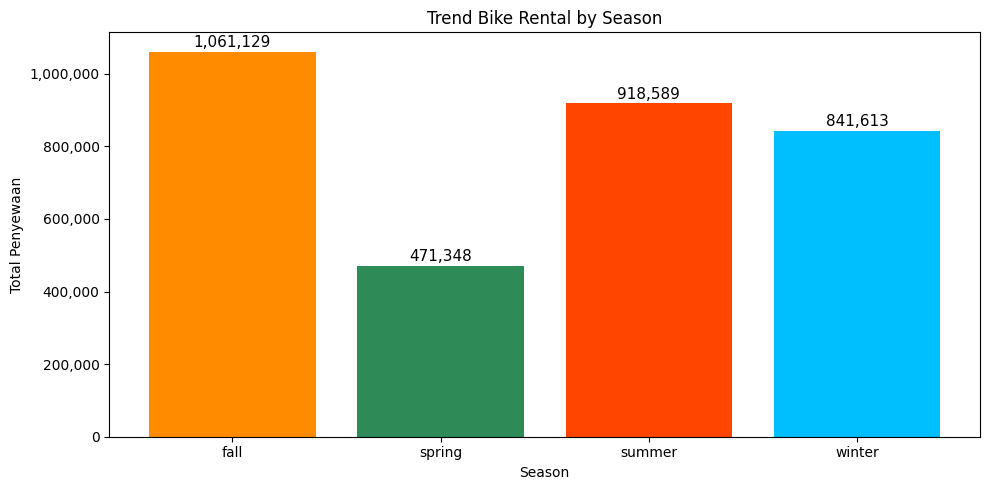

In [33]:
#Trend Rental Bike  by Season
# Data hasil groupby
df_grouped_season = hour_df.groupby(by='season').agg({
    'count': 'sum'
}).reset_index()

# Ambil data dari hasil groupby
seasons = df_grouped_season['season']
count = df_grouped_season['count']

# Buat figure dan axis
plt.figure(figsize=(10, 5))

# Plot bar chart
colors = sns.color_palette(["#FF8C00", "#2E8B57", "#FF4500", "#00BFFF"], n_colors=len(seasons))
plt.bar(seasons, count, color=colors)

# Tambahkan label dan judul
plt.xlabel('Season')
plt.ylabel('Total Penyewaan')
plt.title('Trend Bike Rental by Season')

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan jumlah di atas bar
for i, value in enumerate(count): # Assuming 'count' is defined elsewhere
    plt.text(seasons[i], value + 5000, format(value, ','), ha='center', va='bottom', fontsize=11)

# Tampilkan grafik
plt.tight_layout()
plt.show()

### Pertanyaan 2: Trend total penyewaan berdasarkan *weather situation*

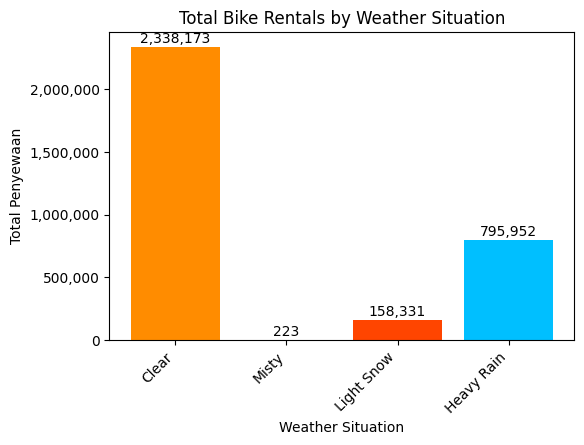

In [36]:
# Total Bike Rentals by Weather Situation

import matplotlib.pyplot as plt
import seaborn as sns

weather_situation = hour_df['weather_situation'].unique()
count = hour_df.groupby('weather_situation')['count'].sum()

plt.figure(figsize=(6, 4))

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

colors = sns.color_palette(["#FF8C00", "#2E8B57", "#FF4500", "#00BFFF"], n_colors=len(weather_situation))
plt.bar(weather_situation, count, color=colors)

#sns.barplot(x='weather_situation', y='count', data=grouped_hour)
plt.title('Total Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Penyewaan')

for i, value in enumerate(count):
    plt.text(i, value + 10000, format(value, ','), ha='center', va='bottom')

_ = plt.xticks(rotation=45, ha='right')

### Pertanyaan 3: Bagaimana Perbandingan Penyewaan Sepeda berdasarkan jenis penyewa (*casual vs register*)?


In [37]:
# Total Bike Rental by User Type
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(hour_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(hour_df['registered'])

# Data untuk bar chart
data = {
    'Tipe Penyewa': ['Casual', 'Registered'],
    'Total Penyewaan': [total_casual, total_registered]
}

# Membuat DataFrame dari data
total_penyewa = pd.DataFrame(data)

In [38]:
total_penyewa.head()

,Tipe Penyewa,Total Penyewaan
0,Casual,620017
1,Registered,2672662


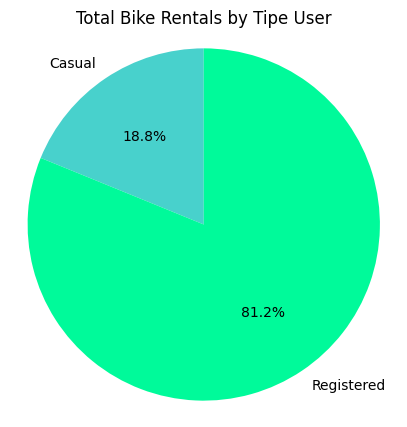

In [39]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(total_penyewa['Total Penyewaan'], labels=total_penyewa['Tipe Penyewa'], autopct='%1.1f%%', startangle=90, colors=['#48D1CC','#00FA9A'])
plt.title('Total Bike Rentals by Tipe User')
_ = plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

### Pertanyaan 4: Perbandingan  total Penyewaan Sepeda berdasarkan kategori hari (*weekdays vs weekend*).

In [40]:
hour_df.groupby(by='category_days').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count',ascending=True)

,casual,registered,count
category_days,,,
weekend,294373,627461,921834
weekdays,325644,2045201,2370845


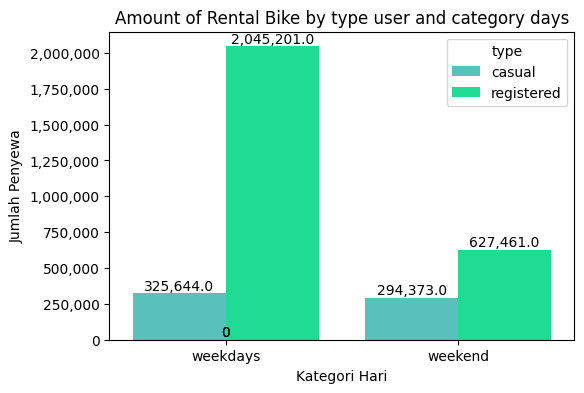

In [41]:
# Rental Bike by User n Category Days
# Group by berdasarkan kategori hari kemudian tampung kedalam variable
df_grouped = hour_df.groupby(by='category_days').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Sesuaikan data menjadi long format (untuk seaborn)
df_melt = df_grouped.melt(id_vars='category_days', value_vars=['casual', 'registered'],
                          var_name='type', value_name='sum')

# Membuat figure
plt.figure(figsize=(6, 4))
colors = ['#48D1CC','#00FA9A']
ax = sns.barplot(x='category_days', y='sum', hue='type', data=df_melt, palette=colors)

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan label dan judul
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Penyewa')
plt.title('Amount of Rental Bike by type user and category days')

# Tambahkan jumlah di atas bar
for p in ax.patches:
    # Ambil tinggi bar
    height = p.get_height()
    # Tambahkan teks di atas bar
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 5),  # offset teks di atas bar
                textcoords = 'offset points')

# Tampilkan grafik
plt.show()

### Pertanyaan 5: Bagaimana Trend total penyewaan sepeda per bulan ?

In [42]:
#Trend Month revenue from Rental Bike
# Create the mappings dictionary
mappings = {
    'month': {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nop', 12: 'Des'
    }
}
hour_df['month'] = pd.to_datetime(hour_df['date']).dt.month
hour_df['month_name'] = hour_df['month'].map(mappings['month'])

hour_df['month_name'] = pd.Categorical(hour_df['month_name'], categories=mappings['month'].values(), ordered=True)

monthly_count = hour_df.groupby('month_name', observed=True)['count'].sum()

In [43]:
monthly_count

,count
month_name,
Jan,134933
Feb,151352
Mar,228920
Apr,269094
Mei,331686
Jun,346342
Jul,344948
Aug,351194
Sep,345991


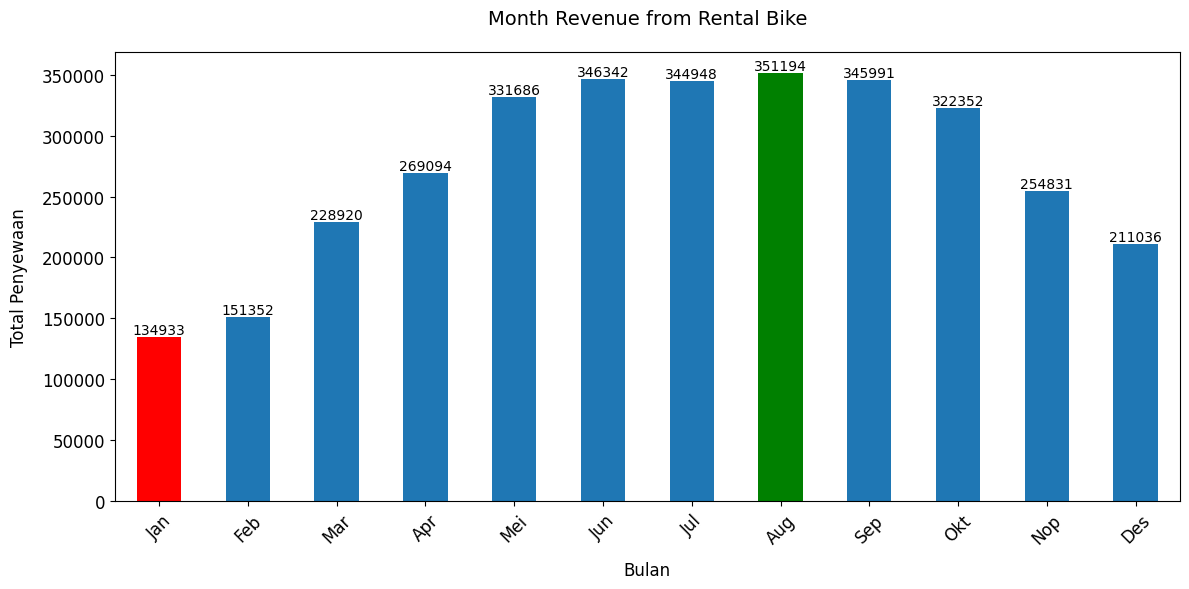

In [44]:
#Tittle :Month Revenue from Rental Bike
# Group data and calculate total rentals per month
monthly_revenue = hour_df.groupby('month_name', observed=True)['count'].sum()

# Find the index of the highest and lowest values
max_index = monthly_revenue.idxmax()
min_index = monthly_revenue.idxmin()

# Create a list of colors, initially all 'tab:blue'
colors = ['tab:blue'] * len(monthly_revenue)

# Set the color for the highest value to green
colors[monthly_revenue.index.get_loc(max_index)] = 'green'

# Set the color for the lowest value to red
colors[monthly_revenue.index.get_loc(min_index)] = 'red'

# Create the bar chart
ax = monthly_revenue.plot(kind='bar', figsize=(12, 6), color=colors)

# Customize the chart
ax.set_title('Month Revenue from Rental Bike', fontsize=14, pad=20)
ax.set_xlabel('Bulan', fontsize=12, labelpad=10)
ax.set_ylabel('Total Penyewaan', fontsize=12, labelpad=10)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 5),
                ha='center', va='bottom', fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

**Insight**
*   Total Penyewaan Sepeda, tertinggi pada  Season Fall/Musim Gugur baik unutk jenis tipe penyewa casual maupun register dengan total penyewaan sebesar 1.061.129 dan penyewaan terendah pada musim semi sebesar  471348
*   Penyewaan sepeda juga dipengaruhi cuaca, total penyewaan terbanyak terjadi pada cuaca cerah (*clear*), sedangkan pada cuaca hujan lebat (*heavy rain*) maka akan sedikit penyewaan.
*  Tipe Penyewa Registered lebih banyak dibanding casual.
*   Total Penyewaan sepeda tertinggi pada weekdays dan jenis tipe penyewa registered yang tertinggi melakukan penyewaan.
*  Penyewaan sepeda tertinggi pada bulan Agustus dan terendah pada bulan Januari.



# **Conclusion**

1. Bagaimana Trend Penyewaan Sepeda
berdasarkan musim?
2. Bagaimana Trend Penyewaan sepeda berdasarkan Cuaca (weather situation)?
3. Bagaimana Perbandingan Penyewaan Sepeda berdasarkan jenis penyewa (casual vs register)?
4. Perbandingan total Penyewaan Sepeda berdasarkan hari (weekdays vs weekend) teks tebal dan jenis penyewa.
5. Bagaimana trend total penyewaan sepeda perbulan?

**Hasil Analisis:**

- Conclusion 1: Berdasarkan Grafik Trend Penyewaan sepeda berdasarkan musim, maka didapatkan hasil Fall Season atau musim Gugur merupakan musim yang paling banyak terjadi penyewaan sepeda dan Spring Season/musim semi merupakan season yang paling sedikit terjadi penyewaan.
- Conclusion 2: Berdasarkan hasil visualisasi grafik, cuaca cerah merupakan pilihan penyewa dalam melakukan transaksi karena terlihat dari data memiliki total penyewaan tertinggi dan pada saat cuaca hujan lebat akan sedikit yang melakukan penyewaan sepeda.
- Conclusion 3: Penyewa tipe Registered lebih banyak melakukan transaksi penyewaan dibandingkan casual, berdasarkan visualisasi grafik didapatkan >80% transaksi berasal dari penyewa tipe Registered.
- Conclusion 4: Weekdays merupakan pilihan hari banyak dilakukan penyewaan baik Registered maupun casual. Tetapi bisa dilihat juga dari hasil visualisasi grafik, rasio perbandingan penyewa registered dan casual tidak terlalu besar di Weekend sedangkan bila di weekdays perbandingan rasio transaksi penyewa registered dan casual sangat besar.
- Conclusion 5: Berdasarkan hasil visualisasi grafik didapati bahwa pada bulan Agustus memiliki transaksi tertinggi dan bulan Januari merupakan bulan dengan transaksi yang paling sedikit dalam penyewaan sepeda.



## Analisis Lanjutan

In [54]:
# Define time bins
bins = [0, 6, 12, 18, 24]
labels = ['Malam', 'Pagi', 'Siang', 'Sore']

# Create a new column for time of day
hour_df['time_of_day'] = pd.cut(hour_df['hour'], bins=bins, labels=labels, right=False)

In [55]:
# Define rental frequency bins
bins = [0, 50, 100, hour_df['count'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']

# Create a new column for rental frequency
hour_df['rental_frequency'] = pd.cut(hour_df['count'], bins=bins, labels=labels, right=False)

Frekuensi penyewaan rendah, sedang, dan tinggi mengacu pada jumlah penyewaan sepeda yang terjadi dalam periode waktu tertentu

In [78]:
# Define recency bins and remove duplicates
bins = [0, 180, 360, hour_df['recency'].max()+1]
recency_labels = ['Baru', 'Menengah', 'Lama']

# Create a new column for recency
hour_df['usage_duration'] = pd.cut(hour_df['recency'], bins=bins, labels=recency_labels, right=False) # Use 'bins' instead of 'recency_bins'

Insight : Durasi penggunaan mengacu lama nya waktu sejak terakhir kali pengguna menyewa sepeda dan dibagi menjadi tiga kategori yaitu
*   Baru : Pengguna yang baru menyewa sepeda dalam waktu kurang dari 180 hari(6 bulan)
*   Menengah : pengguna yang terakhir kali menyewa antara 180 hari dan 360 hari (6 bulan s.d 1 tahun)
*  Lama  : Pengguna yang menyewa sepeda melebihi 360 hari (melebihi dari 1 tahun)



In [84]:
# Display the count of each cluster for time of day
time_of_day_counts = hour_df['time_of_day'].value_counts()
print("Jumlah masing-masing hasil klusterisasi berdasarkan waktu penggunaan:")
print(time_of_day_counts)


Jumlah masing-masing hasil klusterisasi berdasarkan waktu penggunaan:
time_of_day
Siang    4375
Sore     4368
Pagi     4360
Malam    4276
Name: count, dtype: int64


In [85]:
# Display the count of each cluster for usage duration
usage_duration_counts = hour_df['usage_duration'].value_counts()
print("\nJumlah masing-masing hasil klasterisasi berdasarkan durasi penggunaan:")
print(usage_duration_counts)


Jumlah masing-masing hasil klasterisasi berdasarkan durasi penggunaan:
usage_duration
Lama        8788
Menengah    4311
Baru        4280
Name: count, dtype: int64


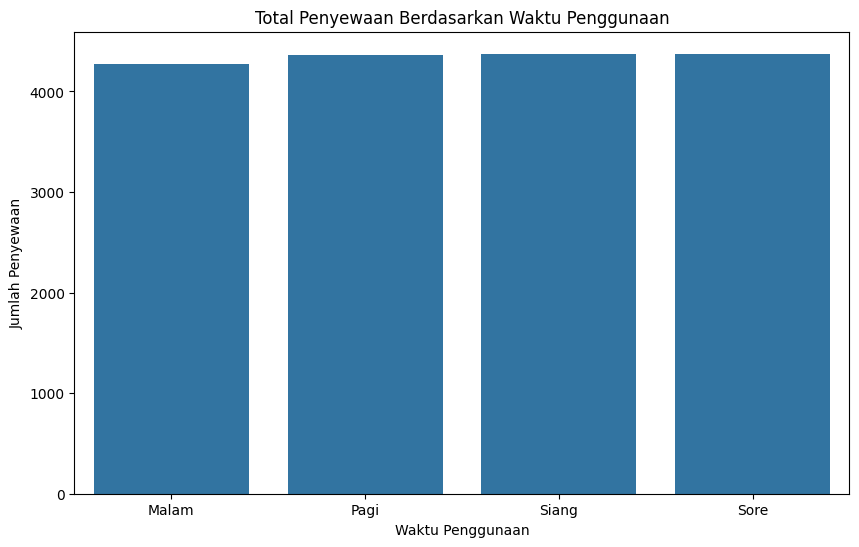

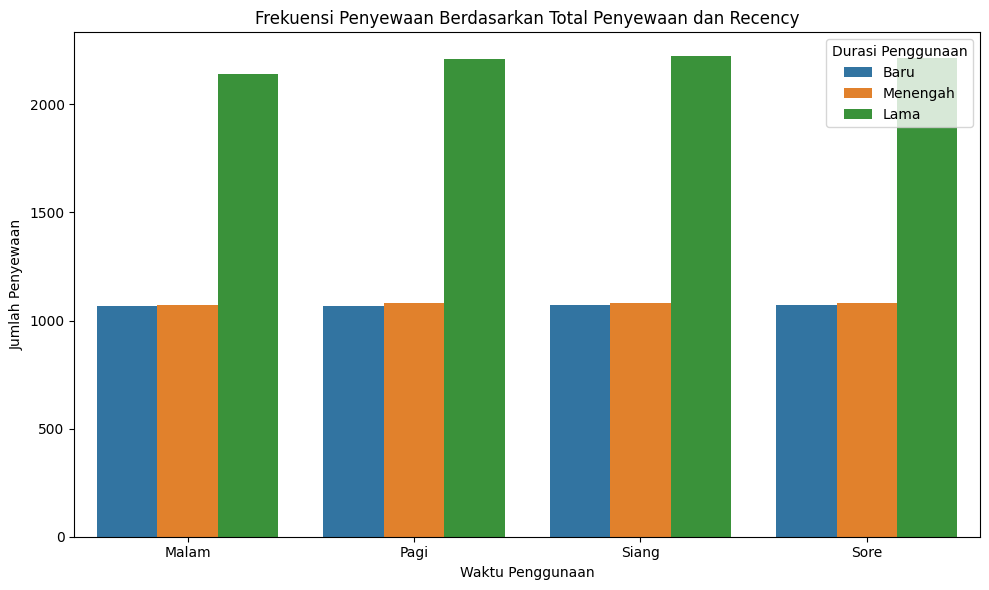

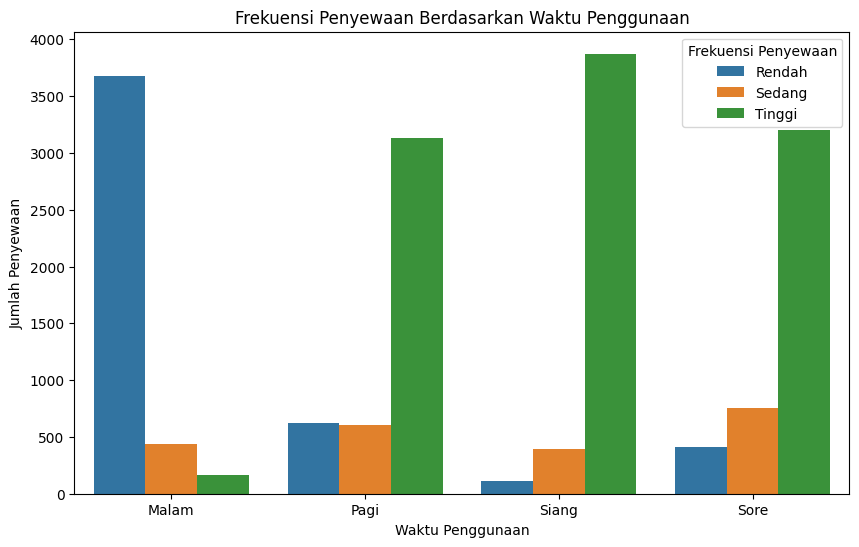

In [87]:
# Plot total rentals by time of day
plt.figure(figsize=(10, 6))
sns.countplot(data=hour_df, x='time_of_day')
plt.title('Total Penyewaan Berdasarkan Waktu Penggunaan')
plt.xlabel('Waktu Penggunaan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Plot recency by time of day
plt.figure(figsize=(10, 6))
sns.countplot(data=hour_df, x='time_of_day', hue='usage_duration')
plt.title('Frekuensi Penyewaan Berdasarkan Total Penyewaan dan Recency')
plt.xlabel('Waktu Penggunaan')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Durasi Penggunaan')
plt.show()

# Plot rental frequency by time of day
plt.figure(figsize=(10, 6))
sns.countplot(data=hour_df, x='time_of_day', hue='rental_frequency')
plt.title('Frekuensi Penyewaan Berdasarkan Waktu Penggunaan')
plt.xlabel('Waktu Penggunaan')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Frekuensi Penyewaan')
plt.show()

# Insight
* Grafik Total Penyewaan berdasarkan waktu: Siang  hari (12.00 - 18.00) memiliki total penyewaan tertinggi meski tidak terlalu berbeda jauh antara pagi hari (06.00 - 12.00) dan sore (18.00 - 24.00)sedangkan malam hari (00.00-06.00) memiliki total penyewaan terendah.
* Grafik frekuensi penyewaan berdasarkan total penyewaan dan recency sebagai berikut :
  * pengguna "baru" cenderung menyewa sepeda dengan frekuensi rendah dan sedang
  * pengguna "menengah" memiliki distribusi frekunsi yang lebih merata pada semua kategori frekuensi penyewaan
  * Pengguna "lama" cenderung menyewa sepeda dengan frekuensi tinggi khususnya pada jam sibuk (pagi, siang dan sore)
* Grafik Frekuensi Penyewaan dan waktu penggunaan, frekuensi penyewaan tertinggi pada waktu sibuk yaitu siang hari (12.00 -18.00) serta Frekuensi penyewaan terendah terjadi pada malam hari  dan frekuensi dengan kategori "sedang" serta "rendah lebih merata di semua waktu penggunaan.

**Analisis lanjutan clustering berdasarkan waktu, frekuensi dan recency**

# **1. Waktu Puncak Penggunaan**
*  Waktu puncak penyewaan hampir merata baik pada pagi, siang , sore atau malam dimana total penyewaan tertinggi pada siang hari.
*  Total penyewaan terendah pada malam hari

# **2. Pola Durasi dan Frekuensi Penyewaan**

* Pengguna Lama (recency "lama") cenderung menyewa sepeda dengan frekuensi tinggi , sedangkan pengguna ("baru dan sedang") lebih bervariasi dalam frekuensi serta waktu penyewaannya dan dimana lebih dominan pada frekuensi rendah dan sedang.

# **3. Preferensi Waktu**

* Frekuensi penyewaan dengan kategori "Tinggi" lebih banyak terjadi pada Siang hari, sedangkan frekuensi penyewaan dengan kategori "Rendah" dan "Sedang" lebih merata di semua waktu penggunaan.


Analisis ini dapat menjadi inside bagi manajemen rental untuk memberikan promosi berupa disko pada waktu - waktu penyewaan sepi, selain itu penjadwalan perawatan juga dapat dilakukan dengan merujuk kepada waktu puncak penggunaan sepeda.

In [ ]:
hour_df.to_csv('hour.csv', index=False)